이유한님 커널 

https://www.youtube.com/watch?v=_iqz7tFhox0&list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF&index=1

In [22]:
# from google.colab import files
from google.colab import drive

drive.mount('/content/gdrive')\

# files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


-lha 는 왜 쓰는거지 ls 앞에

In [23]:
!pip install kaggle

In [24]:
ls -lha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [0]:
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle competitions download -c 2019-1st-ml-month-with-kakr

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!pwd

/content



[1] 준비
---



In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import missingno as msno # 데이터의 null 이 많을 때 찾기 유용하게 해줌
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 
# 그래프가 그려지면 새로운 창에 생성되는데 이 결과 안에 나올수있도록 하는것

그래프 세팅

In [0]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
# df_train.head()

In [32]:
# df_train.describe()
df_train.get_values()

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

format string 
{:^10}중앙 {:>10}오른쪽 {:<10} 왼쪽

In [33]:
for col in df_train.columns:
  msg = 'column: {:^10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)
  

column: PassengerId 	 Percent of NaN value: 0.00%
column:  Survived  	 Percent of NaN value: 0.00%
column:   Pclass   	 Percent of NaN value: 0.00%
column:    Name    	 Percent of NaN value: 0.00%
column:    Sex     	 Percent of NaN value: 0.00%
column:    Age     	 Percent of NaN value: 19.87%
column:   SibSp    	 Percent of NaN value: 0.00%
column:   Parch    	 Percent of NaN value: 0.00%
column:   Ticket   	 Percent of NaN value: 0.00%
column:    Fare    	 Percent of NaN value: 0.00%
column:   Cabin    	 Percent of NaN value: 77.10%
column:  Embarked  	 Percent of NaN value: 0.22%


iloc : 전체 다 가져옴

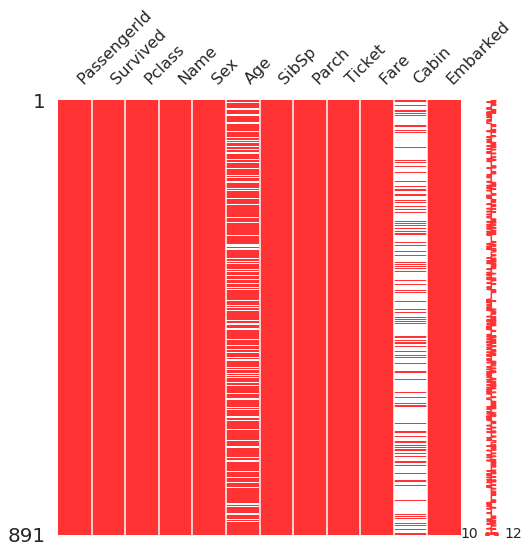

In [34]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(1, 0.2, 0.2))
# msno.bar


[2] EDA
---





---

Imbalanced dataset 체크

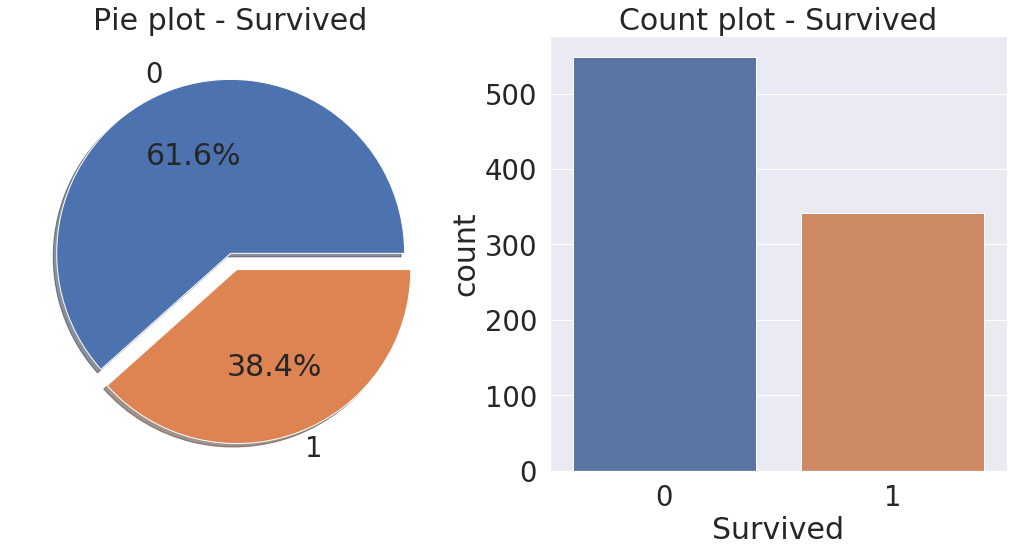

In [35]:
f, ax = plt.subplots(1 , 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # .plot.pie 로 보여주기 # 크기, 안에있는 값 어떻게 나타낼건지, 어떤 파트에 집어넣을지, 그림자 넣을지 말지
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # label 없에기
sns.countplot('Survived', data= df_train, ax = ax[1]) # 컬럼 이름, 데이터 누구인지, 서브플롯 중에 어떤 파트에 집어너을지
ax[1].set_title('Count plot - Survived')
plt.show()

In [36]:
df_train.shape

(891, 12)

차원도 크고 특성이 너무 많으니 특성들을 보고 상관관계 같은걸 봐야함

##2.1 Pclass 보기 
- 범주형
- 이에 따른 생존율 살펴보기

pivot - groupby
데이터를 묶어서 보기

++ 대학원생 - 목적을 알고 하면 기대라도 되지 ㅎㅎ

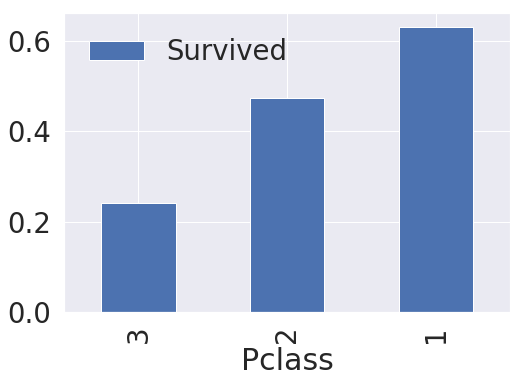

In [37]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # 그룹내 전체 인원
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() # 생존한 사람
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() # 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar()
# pclass 를 인덱스로 해둬야 나중에 그림그릴때 편해짐
# dataframe 은 무조건 plot 이 가능

In [38]:
# pd.crosstab(df_train['Survived'], df_train['Pclass'], margins=True)
pd.crosstab(df_train['Survived'], df_train['Pclass'], margins=True).style.background_gradient(cmap='binary')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


visualization 에선 다양하게 잘 그리는게 최고임


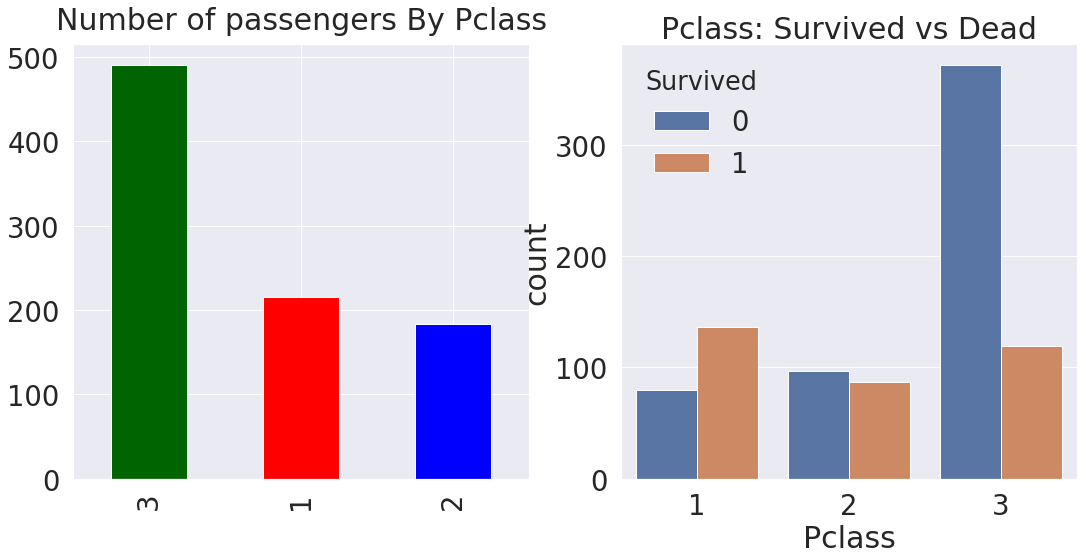

In [39]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['darkgreen', 'red', 'blue'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('') # label 없에기
sns.countplot('Pclass', hue = 'Survived', data= df_train, ax = ax[1]) # hue 를 통해 주력인 p class 를 survived 에 맞게 나누어 보여줌
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

##2.2 Sex

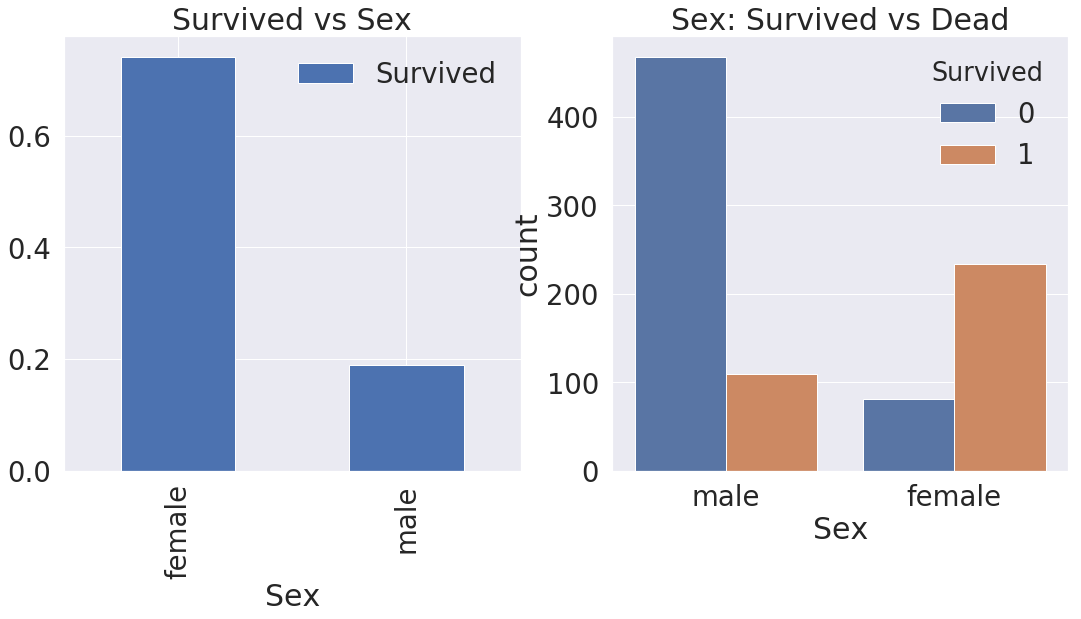

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()



In [41]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [42]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


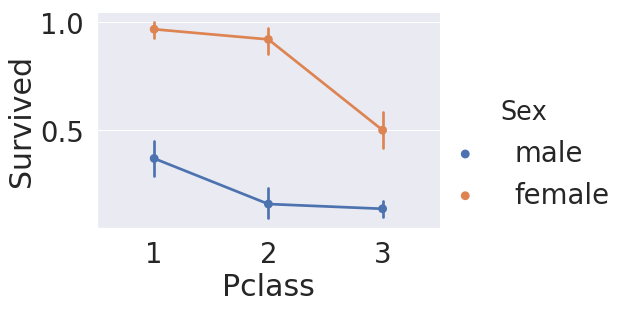

In [43]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, aspect=5)

- Lady first.
- Money brings opportunity to survive.

똑같은 Pclass 가지고 플랏 나누기
*이걸 col 대신 hue 쓰면 같은 플랏에 생김



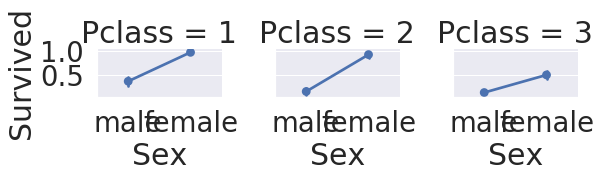

In [44]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5,
              size=3, aspect=1)
# sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=.5,
#               size=5, aspect=1)

참고 -  점에 위아래로 에러바가 생김. 너무 크면 오차 구간이 크므로 큰 의미가 없음


[The link between error bars and statistical significance](http://fisbio.biof.ufrj.br/restrito/bioEstatistica/90_top_especiais/errorbars_stat_significance.htm)


Age
---



In [45]:
print("제일 나이 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("제일 나이 어린 탑승객 : {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 어린 탑승객 : 0.4 years
탑승객 평균 나이: 29.7 years


In [0]:
foo = df_train['Age']

다양한 판다스의 제공 메서드를 보려면 다음 과 같이 변수화 한 다음에 탭 눌러서 확인, 구글로 확인

In [47]:
foo.abs()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

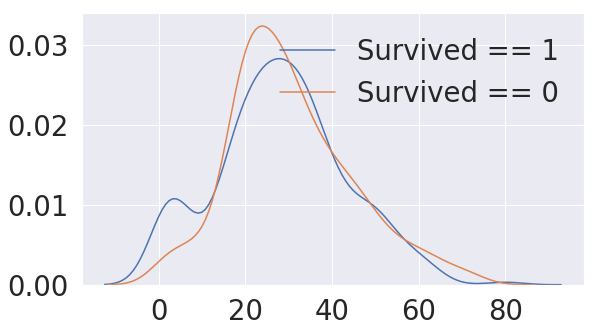

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()


비교 - kdeplot 과 histogram

kde = 커널 밀도 추정
보통 데이터 분포를 이야기 할 때 쓰이는 가우시안 분포를 모델에 맞추거나 데이터의 분포를 그대로 본뜨는(히스토그램)을 이용하는데 히스토그램은 딱딱하니깐 그보다 스무스하게 나오는 밀도 추정을 통해 시각화를 함

[커널밀도추정에 의한 분포근사](https://blog.naver.com/loiu870422/220660847923)

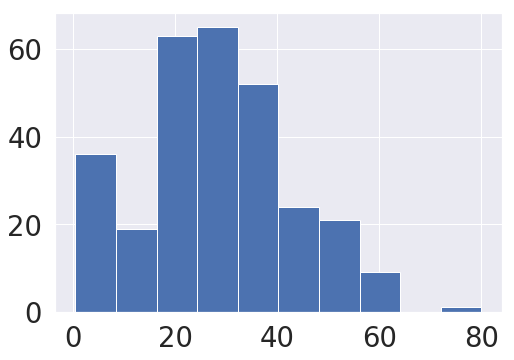

In [49]:
df_train[df_train['Survived'] == 1]['Age'].hist()

인덱싱 하는 법
슬라이싱//iterrows, cols//특정 조건해당하는 사람 넣기

In [138]:
df_train.iloc[2:3] # 슬라이싱
# for i in df_train.iterrows(): # row를 자동으로 하나씩 검색. enumerate 와 같음
# df_train[df_train['Survied'] == 1] # survived 가 1 인 대상만 검색

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1


plt 나타내는 3가지 방법

In [0]:
# f = plt.figure(figsize = (10,10)) # axis 없이 도화지를 깔음
# f, ax = plt.subplots(1, 1, figsize = (10, 10)) # axis 를 구분해서 넣을 수 있음(여러 그래프) ax.plot을 마지막에 label 을 ax.set_xlabel
# plt.figure(figsize(10, 10)) # 도화지도 안깔고 바로 플랏. plt.plot 을 마지막에 해줘야함. label 을 plt.xlabel 이용 

class 에 따른 kdeplot 분류

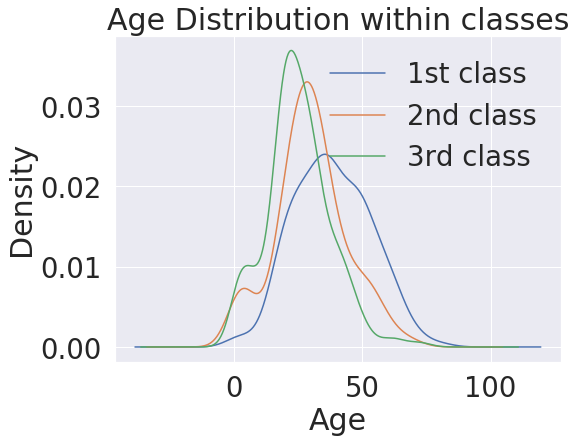

In [52]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')# hist 로 하면 플롯이 겹쳐서 안보임
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title("Age Distribution within classes")
plt.legend(['1st class', '2nd class', '3rd class'])

생존했는지 여부에 따라 다른 플랏을 보고 싶어서 다음 진행

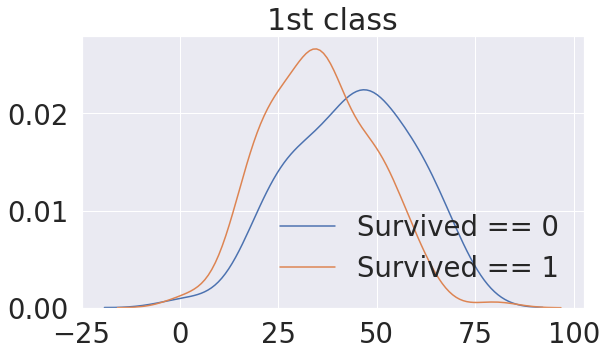

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title("1st class")
plt.show()


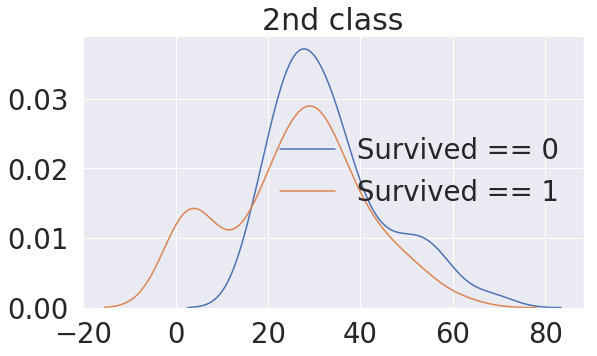

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title("2nd class")
plt.show()
# 참고 - 추정이라서 음수가 나옴

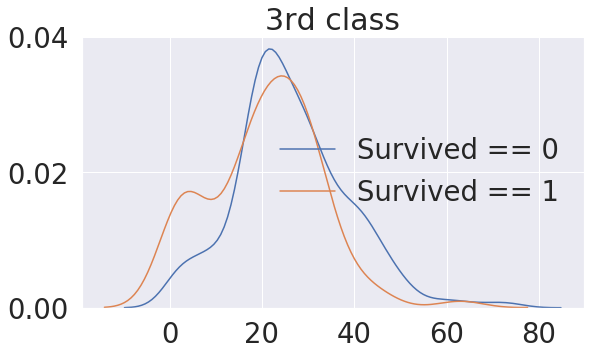

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title("3rd class")
plt.show()


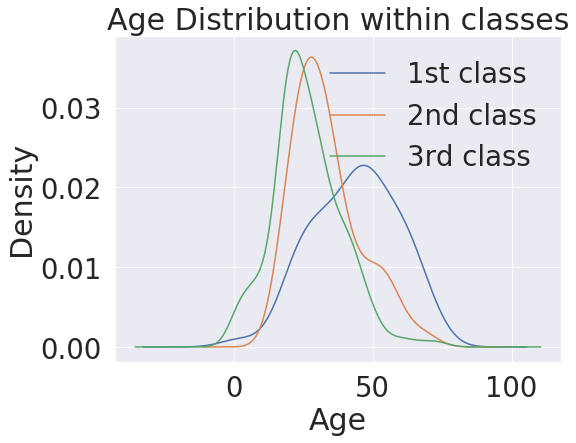

In [56]:
plt.figure(figsize=(8, 6))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].plot(kind='kde')# hist 로 하면 플롯이 겹쳐서 안보임
df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)].plot(kind='kde')
df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)].plot(kind='kde')

plt.xlabel('Age')
plt.title("Age Distribution within classes")
plt.legend(['1st class', '2nd class', '3rd class'])

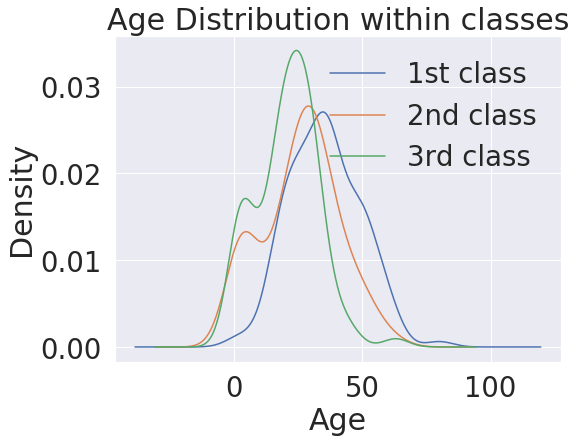

In [57]:
plt.figure(figsize=(8, 6))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].plot(kind='kde')# hist 로 하면 플롯이 겹쳐서 안보임
df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].plot(kind='kde')
df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].plot(kind='kde')

plt.xlabel('Age')
plt.title("Age Distribution within classes")
plt.legend(['1st class', '2nd class', '3rd class'])

어린 친구들이 정말 생존확률이 높은가를 보고 싶음

0-10살, 0-20살 이런식으로 구분해서 

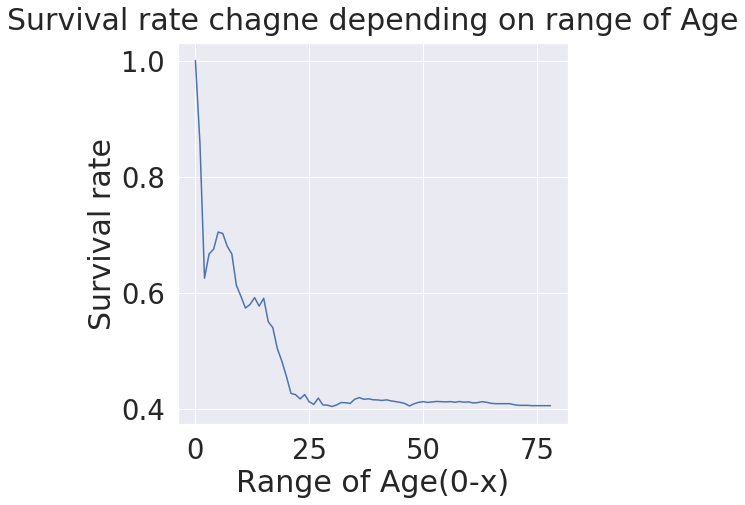

In [58]:
change_age_survival_ratio = []

for i in range(1, 80):
    change_age_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / 
                                     len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(change_age_survival_ratio)
plt.title("Survival rate chagne depending on range of Age", y = 1.02) 
# y 는 그래프에서 타이틀의 위치를 옮겨줌 1.02 가 적절
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

왜 버켓화 해서 0-10 10-20 이 아니고 cumsum 을 이용할까? 

i 살 보다 작은 아이들의 생존확률 
=  i 살보다 작은 아이들의 생존했는지 indicator var 의 합 / i 살보다 작은 아이들의 길이

In [59]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

나이가 어릴 수록 생존확률이 높다.


Pclass, Sex, Age
---
한꺼번에 보기 - violin plot


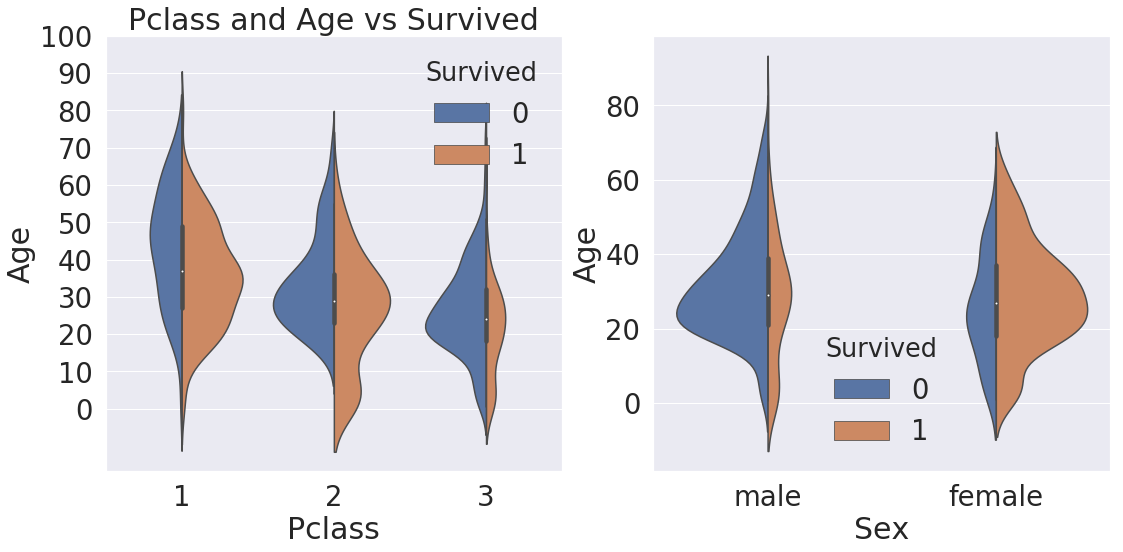

In [60]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data = df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
# scale 을 area 로 바꿀시 왼쪽 오른쪽의 면적을 같게 바꿔주므로 둘의 분포 차이를 알기 쉽다
# scale 을 count로 바꿀시 둘의 값을 scaling 해서 보여주므로 실제 값을 알기 좋다. 둘의 전체적인 차이도 알수 있다 
# range 는 min max 그리고 간격으로 나타난다

sns.violinplot('Sex', 'Age', hue='Survived', data = df_train, scale='count', split=True, ax=ax[1])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))


Embarked
---



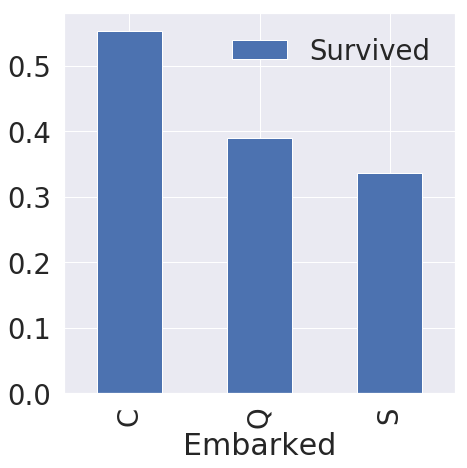

In [61]:
f, ax = plt.subplots(figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax = ax)


In [62]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')
# ascending 

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


얼마나 차이가 나는지를 알긴 어렵지만 ( 나중에 feature importance 로 측정) 적어도 시각적으로는 각 클래스마다 차이가 있어보임. 최소한 눈으로 봤을땐 구분이 가능한 feature 

embarked 와 다른 피쳐 섞기

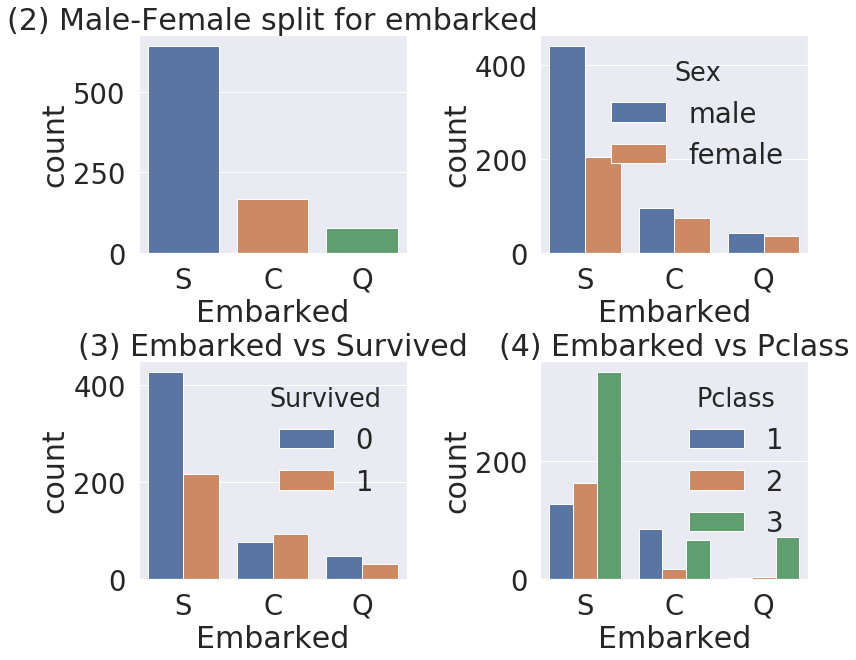

In [63]:
f, ax = plt.subplots(2, 2, figsize = (12, 10))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No.of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 0].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.5, hspace=0.5)# 좌우 상하 간격 맞춰주는 메서드
plt.show()

결과 해석

1) s 가 가장 많이 탐
2) s에선 남자가 더 많고 여자는 적음. - 이것과 옛날에 여자가 생존율이 더 높았다는 사실을 통해 c 와 q 에서 타면 생존률이 높다는 것을 알 수 있음
3) 이를 증명해주는게 3번째. 
4) c 항구에는 여성이 많고 p class 가 1 이 많기 때문에 생존율이 높다 라고 볼 수 있음


Family - SibSp  + Parch
---
자녀와 배우자, 부모 자식 데이터를 합쳐 새로운 family 라는 데이터 생성


In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [65]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


판다스 데이터 프레임 끼리는 서로 사칙연산이 가능하다.

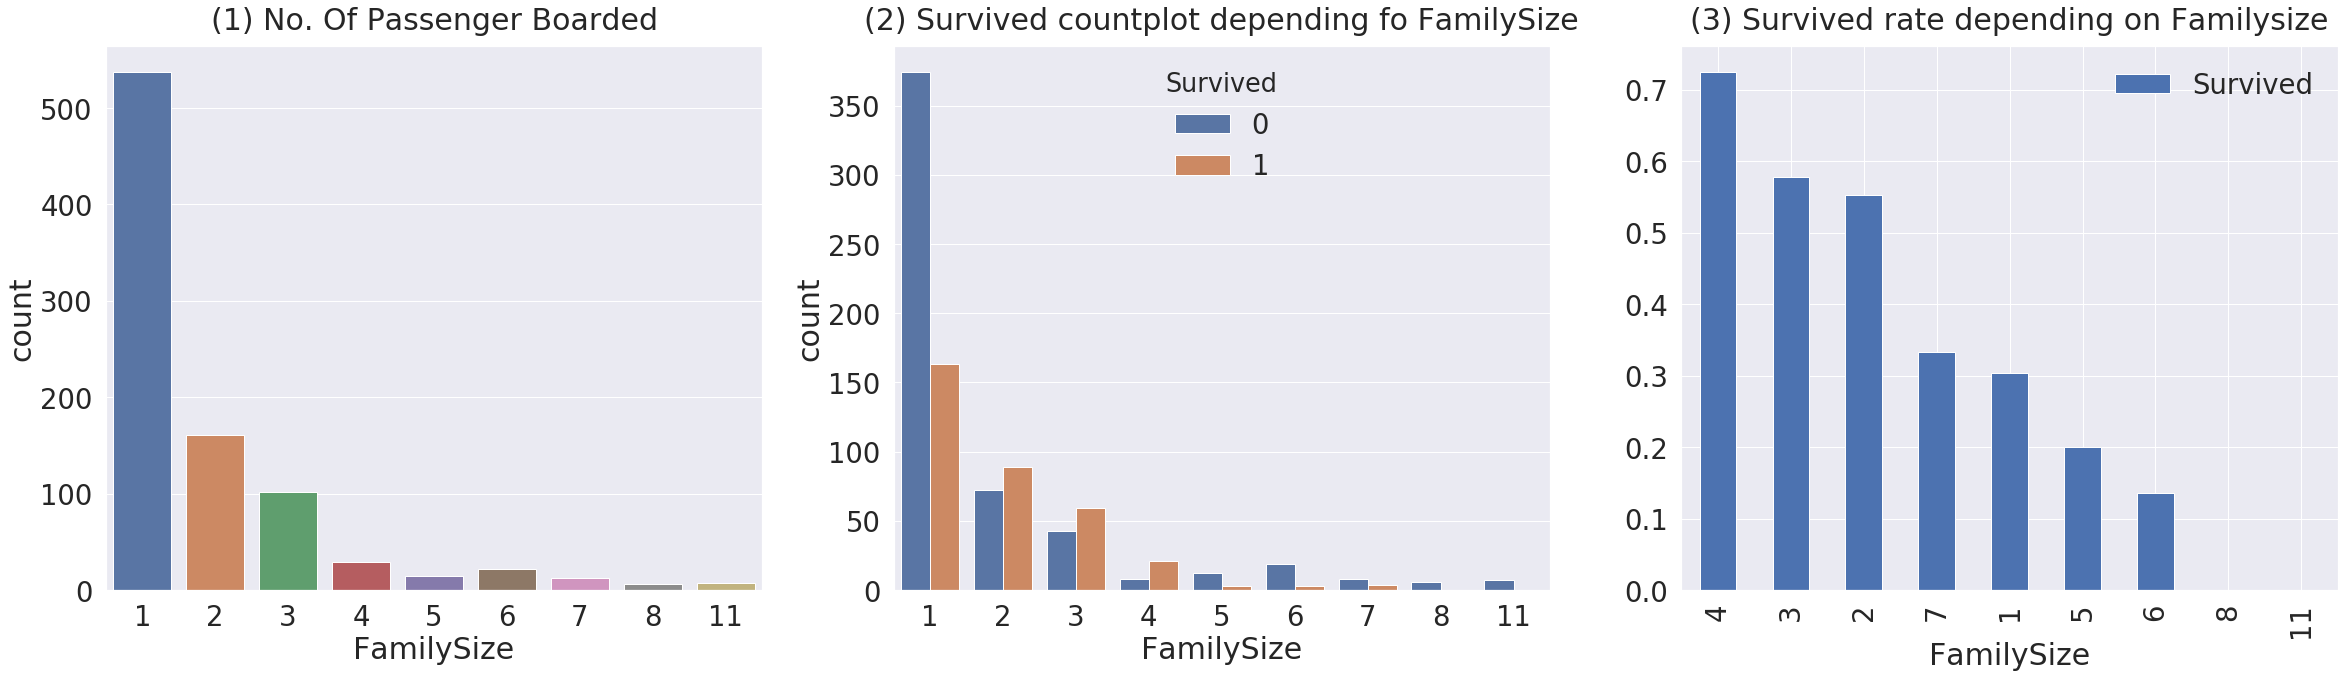

In [66]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y = 1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending fo FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Familysize', y = 1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1) 가족 규모에 따른 승선 카운트
2)생존했는지에 대한 여부
3) 8 명 11명 규모의 가족은 생존율 0프로..


Fare
---



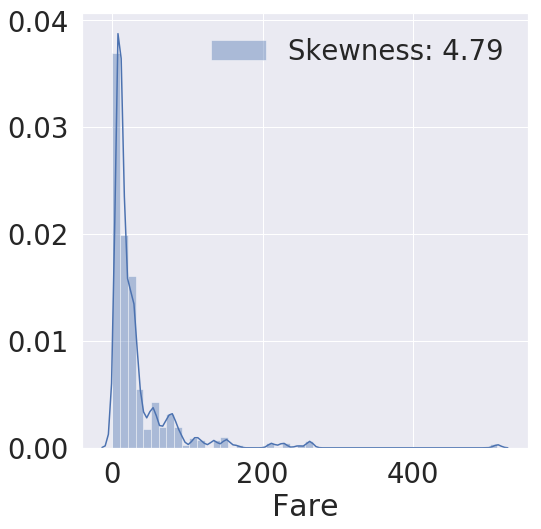

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax= ax)
g = g.legend(loc='best')

왜도와 첨도
왜도나 첨도 가 높으면 머신러닝이 제대로 기능을 못할 수 있음. (이 데이터를 잘 대표할 수 없게 됨)

[관련 내용 블로그](https://blog.naver.com/drwill/221581365327)


여기선 skewness 를 없에는 작업으로서 로그를 취해줌

In [0]:
df_train['Fare']=df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

# map과 apply 모두 데이터프레임 안의 값을 바꿔주는데 보통 map 은 lambda 이고 apply 는 
# 보통 일반 함수를 사용함.


다시보면 skewness 가 줄어들은 것을 볼 수 있음(feature engineering)

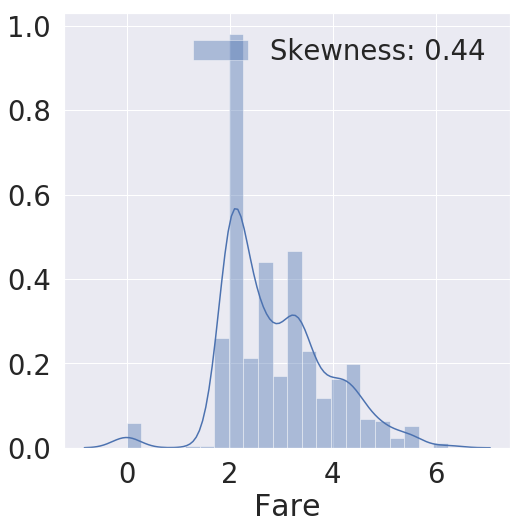

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax= ax)
g = g.legend(loc='best')


Cabin, Ticket
---

널 데이터가 80 퍼센트 이상이라 일단 여기선 사용하지 않음



In [70]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
347088               6
382652               5
S.O.C. 14879         5
347077               4
113760               4
19950                4
349909               4
PC 17757             4
2666                 4
113781               4
4133                 4
LINE                 4
17421                4
W./C. 6608           4
110413               3
363291               3
PC 17582             3
C.A. 31921           3
347742               3
24160                3
F.C.C. 13529         3
371110               3
230080               3
110152               3
13502                3
                    ..
112050               1
28134                1
250648               1
A/5. 2151            1
6563                 1
345767               1
PC 17601             1
A.5. 11206           1
C.A. 5547            1
36963                1
2620                 1
347069               1
349245     

티켓도 일단 뺄 것임. 나중에 pc 나 다른 것들 끼리 그룹핑해서 건드리면 좋을 것임


[3] 피쳐 엔지니어링
---



In [71]:
df_train['Age'].isnull().sum()

177

In [72]:
df_train['Age'].mean()

29.69911764705882

평균으로 null data를 채울수도있음
좀더 특정하게 만들려면 몇 가지 그룹으로 나누어서 그룹의 평균값을 채워넣는 방식을 취할 것임(통계기반)

이것 외에도 null data 를 목표로 설정해서 학습한 모델로 채우는 방식도 있음

In [73]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

이름을 기준으로 그룹을 나누어 볼거임

In [74]:
df_train['Name'].str.extract

<bound method StringMethods.extract of <pandas.core.strings.StringMethods object at 0x7ff226e6dc18>>

정규표현식을 넣어서 각 데이터 안에 조건에 해당하는 텍스트를 추출해주는 메서드임

In [0]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [76]:
temp = df_train['Name'][:10]
temp.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [77]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


별로 없는 애들은 하나로 합치려고함
값을 치환해주는 replace 메서드

In [0]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Jonkheer', 'Rev', 'Col', 'Lady', 'Countess', 'Dona', 'Capt', 'Don', 'Sir', 'Dr', 'Major'
],['Miss', 'Miss', 'Miss', 'Other', 'Other', 'Other', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr'
],inplace=True) #inplace 를 빼면 적용이 안되는게 생김

In [0]:
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Jonkheer', 'Rev', 'Col', 'Lady', 'Countess', 'Dona', 'Capt', 'Don', 'Sir', 'Dr', 'Major'
],['Miss', 'Miss', 'Miss', 'Other', 'Other', 'Other', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr'
],inplace=True) #inplace 를 빼면 적용이 안되는게 생김

In [80]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [81]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.948596,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,NaN,S,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs


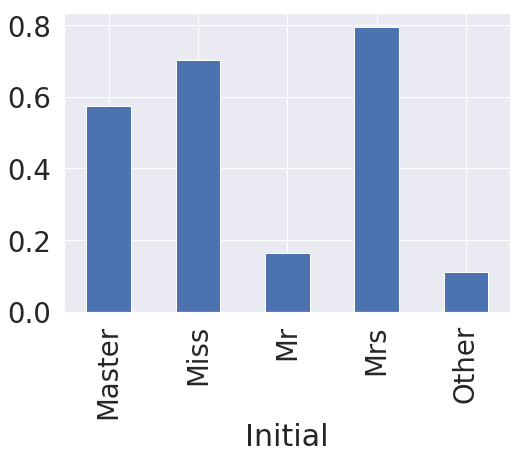

In [82]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

null 데이터 채울때 통계값으로 채우면 헷갈리는게 

이제부터 섬세한 값 채워넣기가 필요해짐 

테스트 데이터셋을 채울 때는 테스트의 데이터통계를 구해서집어넣는게 아니라 트레이닝에서 집어넣었던 값들을 같은 그룹에 똑같이 넣어주는거임

테스트는 봤던거가 아님!

null 데이터 뽑아서 채워넣기 위해 loc 사용
iloc 는 숫자인덱싱 loc 는 라벨이나 trueflase로 볼수있음. 

조건을 다양하게 할 수 있음

In [83]:
df_train.loc[(df_train['Age'].isnull()), :] # 'Age'가 비어있는 값을 가진 모든 행을 출력해라

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,NaN,C,1,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,NaN,Q,1,Miss
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,4.987167,B78,C,2,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,2.047693,NaN,Q,1,Miss
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,2.066331,NaN,C,1,Mr


In [0]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

In [0]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

ctrl + H 눌러서 찾아 바꾸기 가능

In [86]:
for i in df_train.loc[(df_train['Initial'] == 'Mr'), 'Age'].isnull():
    if i:
        print("Null, NaN data has been found")

print("There are no Null, NaN data!")

There are no Null, NaN data!


In [87]:
 df_train.loc[(df_train['Initial'] == 'Mr'), 'Age'].isnull().sum()

0

값 채워넣는 것을 어떤 전략으로 취하냐, 평균이냐 머신러닝 모델이냐 등등에 따라 성능이 엄청나게 달라진다


Embarked 피쳐 확인
---



In [88]:
df_train['Embarked'].isnull().sum()

2

In [89]:
df_train.shape

(891, 14)

데이터 크기에 비해 null 이 별로 없으므로 그냥 fillna메서드를 씀

In [90]:
df_train['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].isnull().sum()

0

Continuous 를 binning 하여 카테고리하기

- 이러면 정보손실이 있을 수 있음



In [0]:
df_train['Age_cat'] = 0

location indexing 작업을 이용해 cont 를 카테고리로 바꿀 수 있음 (하드 코딩 필요)

그보단 함수를 넣어서 쉽게 해볼것임

In [0]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0 
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] <20), 'Age_cat'] = 1
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] <30), 'Age_cat'] = 2
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] <40), 'Age_cat'] = 3
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] <50), 'Age_cat'] = 4 
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] <60), 'Age_cat'] = 5
df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] <70), 'Age_cat'] = 6
df_train.loc[df_train['Age'] >= 70, 'Age_cat'] = 7 

In [0]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0 
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] <20), 'Age_cat'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] <30), 'Age_cat'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] <40), 'Age_cat'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] <50), 'Age_cat'] = 4 
df_test.loc[(df_test['Age'] >= 50) & (df_test['Age'] <60), 'Age_cat'] = 5
df_test.loc[(df_test['Age'] >= 60) & (df_test['Age'] <70), 'Age_cat'] = 6
df_test.loc[df_test['Age'] >= 70, 'Age_cat'] = 7 

In [94]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


apply 메서드 이용해 쉽게하기

In [0]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


In [0]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

서로 같은 지 확인 . 

In [97]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all() # 모든게 true 이면 true
# .any() 하나라도 true 이면 true

True

col 날리기 - drop 메서드

In [139]:
#@title
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace =True)
df_test.drop(['Age'], axis=1, inplace=True)

KeyError: ignored


스트링 데이터를 숫자로 벡터화하기
---



In [99]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

저번처럼 loc 을 사용해서 일일히  = 어쩌구 해줄 수 도 있지만 그보단 이번엔 매핑을 이용할 것

In [0]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [101]:
df_train['Initial'].unique()

array([2, 3, 1, 0, 4])

Embarked 도 바꾸기 

col 에 특정 피쳐가 뭐뭐가 있는지 보는 방법

In [102]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [103]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [105]:
df_train.Embarked.isnull().any()

False

In [106]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
FamilySize     False
Initial        False
Age_cat        False
dtype: bool

In [107]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

피어슨 상관계수 구하기

선형 상관관계만 나타낼 수 ㅣㅇㅆ음

1인 경우 양의 상관관계 -1 는 음
0은 관련없음 

feature 8개 전체에 대해 heatmap 그리기

In [0]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

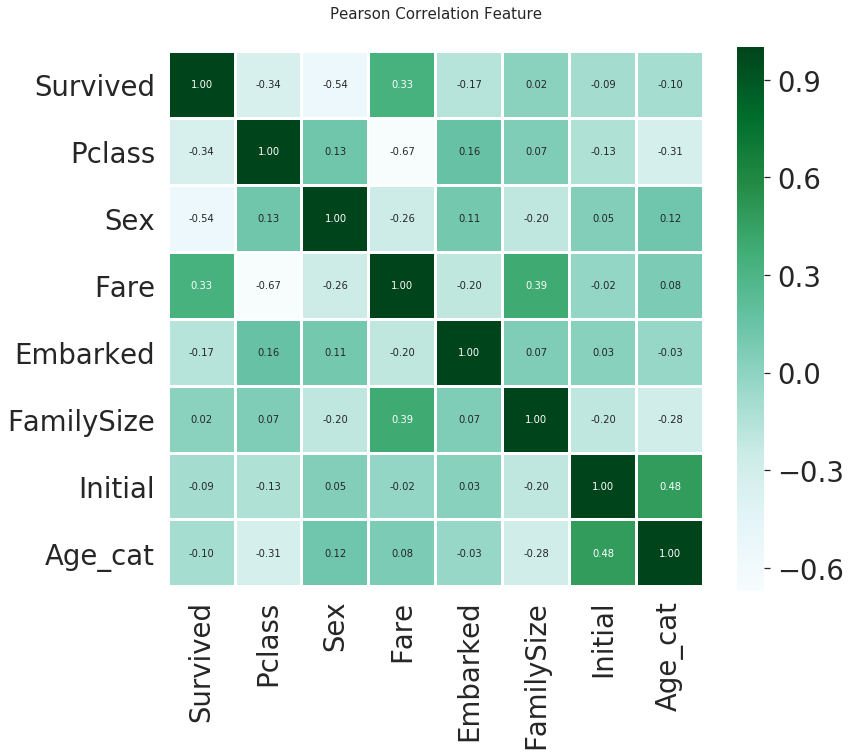

In [110]:
colormap = plt.cm.BuGn
plt.figure(figsize = (12,10))
plt.title('Pearson Correlation Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=2.0, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size' : 10}, fmt = '.2f')

중복 되는 상관관계는 없어보임. 엄청 크리티컬한 피쳐는 없지만 중요한 ㅍ ㅣ쳐는 볼 수 있음. 각 피쳐의 상관관계는 조금 있다고 볼 수 있음


Categorical data 를 원핫 인코딩으로 만들기
---
카테고리 데이터를 정말 카테고리 데이터 답게 쓸 수 있도록 단순히 0, 1, 2, 3 이 아니라 하나의 벡터 형식으로 바꾸는 것을 말함. 

initial 만 할건데, 현재 클래스가 5개니깐 5개 카테고리 중에 무엇인지? 를 [0 1 0 0] 의 형태로 바꾼다고 생각하면 됨. 

이게 왜 좋냐면, 각각의 정보에 대해서 master 인지 아닌지, miss 인지 아닌지를 정확하게 표현할 수 있음 . 

다른 예로 월드컵 에 참가한 국가들의 순위를 보면 사실 거기서 국가들의 순위 정보를 나타내려면 그것은 서술형 데이터임. 순서를 따지는 게 중요함.

카테고리 데이터(예를들어 월드컵 예선 몇 조)는 순서같은게 아니라 뭐보다 크다, 작다가 큰 의미가 없음 ( 특히 결정 트리를 만들 때는 이런 걸 잘 고려해야함)

12년도 월드컵에 10위 안 이였나?
12년도 월드컵에 A조였나?

둘의 정보량은 분명히 다름

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial') 
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial') 
# df_train 안에 initial 컬럼을 지우고 대신 initial_0, 1,.... 로 이어지는 
# 원핫 피쳐컬럼을 붙여줌

In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked') 
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked') 

from sklearn.preprocessing import OnehotEncoder 이것도 있음

데이터 프레임 이 아닌 경우 쓰는 방법

원핫은 클래스의 수에 따라 컬럼이 너무 커져서 오히려 문제가 생길 수 있기 때문에 다른 방식으로 인코딩 가능. 그건 포르투 커널에서 설명할 거임


머신러닝 모델
---

안쓰는 피쳐들 빼주기

In [0]:
df_train.drop({'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'}, axis=1, inplace=True)
df_test.drop({'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'}, axis=1, inplace=True)

In [114]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [115]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [119]:
X_tr.shape

(623, 13)

각각의 sklearn 모델에선 다양한 파라메터가 존재하는데, 얼마나 잘 튜닝하느냐에 따라서 큰차이가 존재함.

편리하게 파라메터 튜닝하는 방법
그리드, 베이지안 등등 

In [120]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
prediction = model.predict(X_vld)

In [122]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [123]:
print("총 {} 명 중 {:.2f}% 의 정확도로 생존 맞춤".format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268 명 중 83.21% 의 정확도로 생존 맞춤


In [124]:
(prediction == y_vld).sum()/ prediction.shape[0]

0.832089552238806


피쳐 임포턴스랑 제출까지
---



피쳐 임포턴스를 가지고 어떤 피쳐에 우리 모델이 가장 큰 영향을 받았는지 알 수 있음. 

In [125]:
model.feature_importances_

array([0.11225051, 0.14127353, 0.31242988, 0.09192244, 0.10916843,
       0.01008843, 0.01277413, 0.12531302, 0.030285  , 0.00686505,
       0.01299825, 0.01484904, 0.01978229])

In [0]:
from pandas import Series

In [127]:
feature_importance = model.feature_importances_
print(len(feature_importance))

13


In [128]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [0]:
Series_feat_imp = Series(feature_importance, index=df_test.columns)

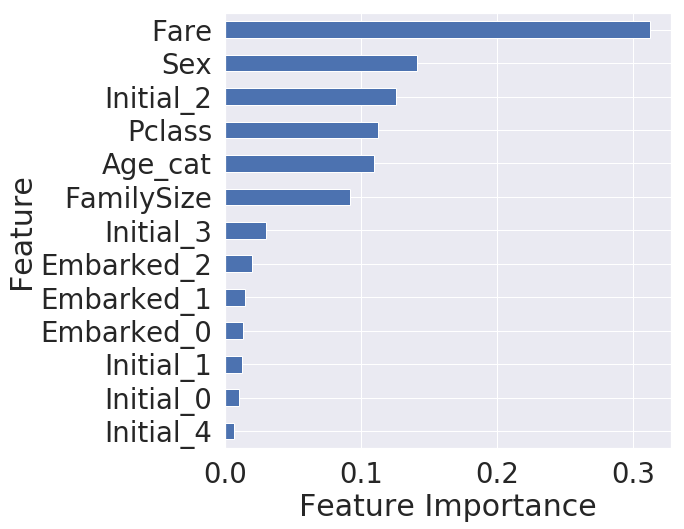

In [130]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


서브미션

In [0]:
submission = pd.read_csv('sample_submission.csv')

In [132]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
prediction = model.predict(X_test)

In [0]:
submission['Survived'] = prediction

In [0]:
submission.to_csv('./my_first_submission.csv', index=False)